In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### 2-dim example cartoon:

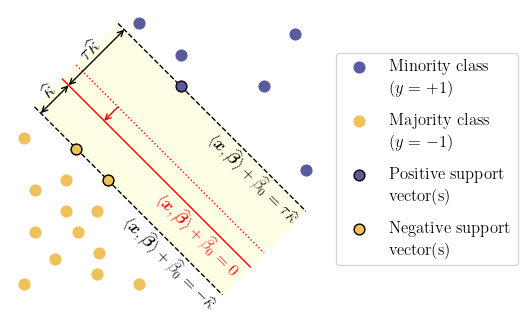

In [2]:
X1 = np.array([
    [1, 2],
    [3, 2], [4, 0], [0, 3.5], [1, 2.75], [3.75, 3.25]
])
X0 = np.array([
    [-0.75, -0.25], [-1.5, 0.5],
    [-0.95, -2], [0, -2.75], [-2, -2.15], [-1, -2.5], [-2.5, -0.5], [-1, -1], [-2.75, -2.75],
    [-2.75, 0.75], [-1.75, -1], [-2.5, -1.5], [-1.75, -0.25], [-1.45, -1.5]
])
X = np.vstack((X1, X0))
y = np.concatenate((np.ones(len(X1)), np.zeros(len(X0))))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=100)
space = '0.3em'
ax.scatter(X1[1:, 0], X1[1:, 1], s=60, c='#5A5B9F', label=rf'\noindent Minority class\\[{space}]($y = +1$)')
ax.scatter(X0[:, 0], X0[:, 1], s=60, c='#F0C05A', label=rf'\noindent Majority class\\[{space}]($y = -1$)')
x1, y1 = np.array([-0.5, 4]), np.array([3.5, -1])
x0, y0 = np.array([-2.5, 2]), np.array([1.5, -3])
ax.plot(x1, y1, color='black', linestyle='--', linewidth=1)
ax.plot(x0, y0, color='black', linestyle='--', linewidth=1)
ax.plot((x1+x0)/2, (y1+y0)/2, color='red', linestyle=':', linewidth=1)
tau = 2
ax.plot(x1*1/(tau+1) + x0*tau/(tau+1),
        y1*1/(tau+1) + y0*tau/(tau+1), color='red', linestyle='-', linewidth=1)
polygon = patches.Polygon([(x1[0],y1[0]), (x1[1],y1[1]), (x0[1],y0[1]), (x0[0],y0[0])],
                          closed=True, edgecolor=None, facecolor='yellow', alpha=0.1)
ax.add_patch(polygon)
ax.scatter(X1[0, 0], X1[0, 1], s=60, c='#5A5B9F', edgecolors='black', linewidth=1, zorder=2,
           label=rf'\noindent Positive support\\[{space}]vector(s)')
ax.scatter(X0[0:2, 0], X0[0:2, 1], s=60, c='#F0C05A', edgecolors='black', linewidth=1, zorder=2,
           label=rf'\noindent Negative support\\[{space}]vector(s)')

dlt = 0.15
txt_dlt = 0.15
tmp = (x1[0]*1/(tau+1) + x0[0]*tau/(tau+1), y1[0]*1/(tau+1) + y0[0]*tau/(tau+1))
ax.annotate(text='', xy=(x1[0]+dlt, y1[0]-dlt), xytext=(tmp[0]+dlt, tmp[1]-dlt),
            arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))
ax.annotate(text='', xy=(x0[0]+dlt, y0[0]-dlt), xytext=(tmp[0]+dlt, tmp[1]-dlt),
            arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))
ax.text((x1[0]+tmp[0])/2 + dlt - txt_dlt, (y1[0]+tmp[1])/2 - dlt + txt_dlt, r'$\tau\widehat\kappa$',
        fontsize=14, rotation=45, ha='center', va='center')
ax.text((x0[0]+tmp[0])/2 + dlt - txt_dlt, (y0[0]+tmp[1])/2 - dlt + txt_dlt, r'$\widehat\kappa$',
        fontsize=14, rotation=45, ha='center', va='center')
ax.annotate(text='', xy=((x1[0]+x0[0])/2+1, (y1[0]+y0[0])/2-1), xytext=(tmp[0]+1, tmp[1]-1),
            arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0, color='red'))

txt_dlt = 0.225
ax.text(3 - txt_dlt, 0 - txt_dlt,
        r'$\langle\boldsymbol{x}, \widehat{\boldsymbol{\beta}}\rangle + \widehat\beta_0 = \tau\widehat\kappa$',
        fontsize=12, rotation=-45, ha='center', va='center')
ax.text(1 - txt_dlt, -2 - txt_dlt,
        r'$\langle\boldsymbol{x}, \widehat{\boldsymbol{\beta}}\rangle + \widehat\beta_0 = -\widehat\kappa$',
        fontsize=12, rotation=-45, ha='center', va='center')
ax.text(3*1/(tau+1) + 1*tau/(tau+1) - txt_dlt, 0*1/(tau+1) + (-2)*tau/(tau+1) - txt_dlt,
        r'$\langle\boldsymbol{x}, \widehat{\boldsymbol{\beta}}\rangle + \widehat\beta_0 = 0$',
        fontsize=12, rotation=-45, ha='center', va='center', color='red')

ax.axis('off')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0, fontsize=12, labelspacing=1)
ax.set_aspect('equal')
plt.savefig('SVM_cartoon.pdf', bbox_inches="tight")